### Purpose:

Using Descriptive Statistics, apply different calculations to measure insights such as:

+ Countries that average the highest/lowest spending
+ Countries above and below average
+ Grouping coutries by percentiles
+ More to add as the project progresses

What concepts will be practiced?

+ Estimates of Location
+ Estimates of Variability
+ Exploring Data Distribution
+ Binary and Categorical Data

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from scipy import stats
from scipy.stats import trim_mean
from statsmodels import robust

df = pd.read_csv('data/state_csv.csv')
df.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [23]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Population,50.0,6162876.30,6848235.35,563626.0,1833004.25,4436369.5,6680312.25,37253956.0
Murder.Rate,50.0,4.07,1.92,0.9,2.42,4.0,5.55,10.3


## Calculating Different Estimates of Location

### For the first exercise, will use the year 2016

#### Mean 
+ Sum of all values divided by the number of values

#### Median
+ (50th Percentile) The value where such value of the data is above, and the other half below

### Trimmed Mean
+ The average of all values after dropping a fixed set of extreme values

### Weighted Mean
+ The sum of all values times a weight divided by the sum of the weights

In [35]:
df = df.rename({"Murder.Rate" : "Murder Rate"}, axis = 1)
df.head(5)

,State,Population,Murder Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [25]:
mean_pop = round(df['Population'].mean(), 2)
mean_pop

6162876.3

In [26]:
median_pop = round(df['Population'].median(), 2)
median_pop

4436369.5

In [27]:
trim_mean_pop = round(stats.trim_mean(df['Population'], 0.1),2)
trim_mean_pop

4783697.12

In [28]:
tr_mean_2 = round(trim_mean(df['Population'], 0.1), 2)
tr_mean_2

4783697.12

In [37]:
weighted_mean = round(np.average(df['Murder Rate'], weights = df['Population']),2)
weighted_mean

4.45

In [41]:
import wquantiles

weighted_median = round(wquantiles.median(df['Murder Rate'], weights = df['Population']), 2)
weighted_median

4.4

## Estimates of Variability 

### Deviations
+ Measure that is used to find the difference betwen the observed value and the expected value of a variable. In other words, it is the distance from the centre point
+ Value - mean of the data

### Variance 
+ The sum of squared deviatons from the mean divided by n - 1 where n is the number of data values
+ Sum of deviations/(count of data values - 1)

### Standard Deviation
+ The Square Root of the Variance

### Mean Absolute Deviation
+ The mean of the absolute values of the deviations from the mean

### Percentile
+ The value such that P percent of the values take on this value or less (100-P) percent to take on this value or more

### Interquartile Range (IQR)
+ The difference between the 75th percentile and the 25th percentile

In [42]:
# calculating the standard deviation of the population

std_deviation = round(df['Population'].std(),2)
std_deviation

6848235.35

In [43]:
iqr = round(df['Population'].quantile(0.75) - df['Population'].quantile(0.25), 2)
iqr

4847308.0

In [44]:
# using numpy to find mean absolute deviation

data = df['Population']
mean = np.mean(data)
abs_dev = np.absolute(data - mean)
mad = round(np.mean(abs_dev), 2)
mad

4450933.36

In [45]:
# now lets use pandas .mad() to see if we get the same answer

p_mad = round(df['Population'].mad(), 2)
p_mad

4450933.36

### Percentiles

In [53]:
# percentiles of population by state

df['Population'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05      689529.00
0.25     1833004.25
0.50     4436369.50
0.75     6680312.25
0.95    19118545.60
Name: Population, dtype: float64

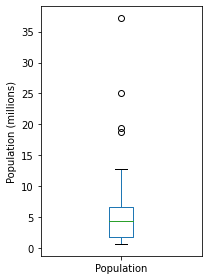

In [55]:
# creating a boxplot to visualize the distribution of population by state

ax = (df['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show();